_______________________________________________________________________________________________

<span style="font-size:25px">
    The aim is to find the numerical solutions of the LQR problems
</span>


<span style="font-size:20px">
    More specifically we will implement two methods to find the optimal control of the problem described in question 4 (of the Part 2 project of MA5232, NUS)
</span>

Our problem:

$X'_t = A_t \cdot X_t +  B_t \cdot u_t$, with here $X_t = (x_t, v_t)^T$, $A_t = ((0, 0)^T, (1, -\alpha_t)^T)$ and $B_t = (0, 1)^T$

The cost functionnal: $\Phi(x) = x^T\cdot M \cdot x$, with here $M = ((1, 0)^T, (0,0)^T)$


And the running cost: $L(t,x,u) = x^T\cdot Q_t \cdot x + u^T\cdot R_t \cdot u$, with here $Q_t = ((0, 0)^T, (0, 0)^T)$ and $R_t = (\lambda)$

_______________________________________________________________________________________________

In [1]:
from matplotlib import pyplot as plt
from math import *
import numpy as np

Let's first solve the optimal control problem, by using the Ricatti Differential Equation satisfied by $P$:

$P'_t = -P_t\cdot A_t - A_t^T\cdot P_t - Q_t + P_t \cdot B_t \cdot R^{-1}_t \cdot B_t^T \cdot P_t$, and $P_T = M$

Solving that and having $X_0$, we directly get: $u_t = - R^{-1}_t\cdot B_t^T \cdot P_t \cdot X_t$

Compute Pt, Xt and then ut

In [2]:
# Let's define all our parameters for that specific problem

In [3]:
N   = 1_000
dt  = 1/N
lam = 0.5

def alpha(t):
    #return(sin(10*t))
    return(t*t)
def A(t):
    A = np.array([[0,1],
                 [0,-alpha(t)]])
    return(A)

B = np.array([[0],
              [1]])
M = np.array([[1,0],
              [0,0]])
R = lam

# Here Q = 0

P  = [M]
X0 = np.array([[1], 
               [0]])
X  = [X0]

In [4]:
for i in range(N):
    Pi = P[-1]
    Ai = A(dt *(N - i))
    Pi = Pi + dt * (np.dot(Pi, Ai) + np.dot(np.transpose(Ai), Pi) - np.dot(np.dot(Pi, B), np.dot(np.transpose(B), Pi)) / lam)
    P.append(Pi)

P = list(reversed(P))

for i in range(N):
    Ai = A(i*dt)
    Xi = X[-1] + dt * np.dot((Ai - np.dot(B, np.dot(np.transpose(B), P[i])) / lam), X[-1])
    X.append(Xi)

u = []
for i in range(N):
    ui = - np.dot((np.dot(np.transpose(B), P[i]) / lam), X[i])
    u.append(ui[0][0])

Result

[-1.1928422456012524, -1.1915510106532328, -1.190259777662943, -1.1889685490054254, -1.187677327048004, -1.186386114150287, -1.1850949126641641, -1.1838037249338094, -1.182512553295679, -1.1812214000785146, -1.1799302676033403, -1.1786391581834654, -1.177348074124484, -1.176057017724276, -1.1747659912730064, -1.1734749970531282, -1.1721840373393793, -1.1708931143987875, -1.1696022304906677, -1.168311387866625, -1.1670205887705536, -1.1657298354386394, -1.1644391300993593, -1.1631484749734837, -1.161857872274076, -1.1605673242064942, -1.1592768329683925, -1.157986400749721, -1.156696029732728, -1.1554057220919611, -1.1541154799942688, -1.1528253055987987, -1.1515352010570041, -1.1502451685126402, -1.148955210101769, -1.1476653279527587, -1.1463755241862854, -1.1450858009153362, -1.1437961602452085, -1.1425066042735135, -1.1412171350901752, -1.1399277547774358, -1.138638465409854, -1.1373492690543083, -1.136060167769998, -1.1347711636084465, -1.133482258613501, -1.132193454821336, -1.130

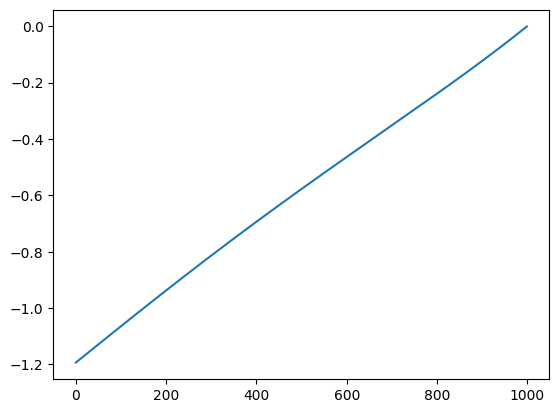

In [5]:
print(u)

print("J=", lam * dt * np.dot(np.transpose(u), u))

plt.plot(u)

_______________________________________________________________________________________________

Let's now introduce another method

This method will just need an initialization $u^0_t$

For a certain number of steps do:

Calculate $X_t$, using: $X'_t = A_t\cdot x_t + B_t \cdot u_t$ & $X_0 = (1, 0)^T$

Calculate $P_t$, using: $P'_t = -A_t\cdot P_t + 2Q_t\cdot X_t$ & $P_T = -2M\cdot X_T$

for t in [0, T]: get $u_t = \frac12 R^{-1}_t \cdot B_t^T \cdot P_t$

In [6]:
# Few parameters that change or that we need to add

In [7]:
steps = 100
N     = 1_000
dt    = 1/N
lam   = 0.5

def alpha(t):
    #return(sin(10*t))
    return(t*t)
def A(t):
    A = np.array([[0,1],
                 [0,-alpha(t)]])
    return(A)

B = np.array([[0],
              [1]])
M = np.array([[1,0],
              [0,0]])
R = lam

# Here Q = 0

p  = []
X0 = np.array([[1], 
               [0]])
X  = [X0]

u  = [1 for i in range(N)]

In [8]:
for s in range(steps):

    for i in range(N):
        Ai = A(i*dt)
        Xi = X[-1] + dt * (np.dot(Ai, X[-1]) + u[i] * B)
        X.append(Xi)

    p  = [-2 * np.dot(M, X[-1])]
    for i in range(1, N):
        Ai = A((N-i)*dt)
        pi = p[-1] - dt * np.dot(Ai, p[-1]) # Q = 0
        p.append(pi)
    p = list(reversed(p))
    
    for i in range(N):
        u[i] = ((1/(2*lam)) * np.dot(np.transpose(B), p[i]))[0][0]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

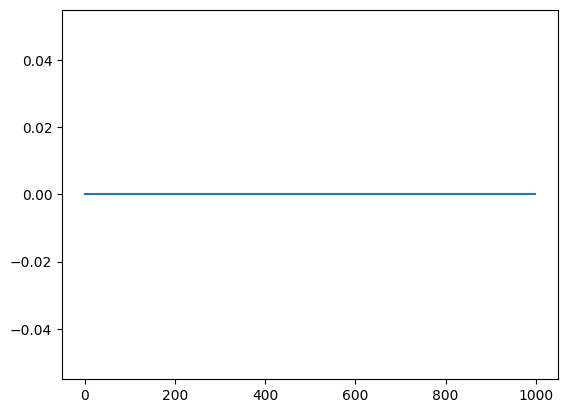

In [9]:
print(u)

print("J=", lam * dt * np.dot(np.transpose(u), u))

plt.plot(u)